## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.410338 -0.982487  1.222290  0.505538 -0.657027 -0.327142
1  0.758111  1.247567  1.260848 -0.388639  0.637619  0.912222
2  0.338601 -0.967999  1.306020 -0.088160  0.777199 -0.004084
3  0.977059  0.124373 -0.206008 -1.427894 -1.377226 -0.496095
4 -0.298015 -1.271954 -1.800582 -1.104932 -0.955003 -0.959636


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9952883	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9840513	total: 69.6ms	remaining: 34.7s
2:	learn: 0.9724863	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9619138	total: 70.7ms	remaining: 17.6s
4:	learn: 0.9518320	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9402744	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9302932	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9198869	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9102784	total: 73.5ms	remaining: 8.09s
9:	learn: 0.9013913	total: 74.1ms	remaining: 7.34s
10:	learn: 0.8903452	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8800138	total: 75.1ms	remaining: 6.19s
12:	learn: 0.8694070	total: 75.7ms	remaining: 5.75s
13:	learn: 0.8604530	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8522912	total: 76.8ms	remaining: 5.04s
15:	learn: 0.8428777	total: 77.3ms	remaining: 4.75s
16:	learn: 0.8346646	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8270643	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8187401	total: 78.7ms	remaining

84:	learn: 0.4431368	total: 109ms	remaining: 1.18s
85:	learn: 0.4396060	total: 110ms	remaining: 1.17s
86:	learn: 0.4353986	total: 111ms	remaining: 1.16s
87:	learn: 0.4312461	total: 111ms	remaining: 1.15s
88:	learn: 0.4278904	total: 111ms	remaining: 1.14s
89:	learn: 0.4249403	total: 112ms	remaining: 1.13s
90:	learn: 0.4206947	total: 112ms	remaining: 1.12s
91:	learn: 0.4166387	total: 113ms	remaining: 1.11s
92:	learn: 0.4135315	total: 113ms	remaining: 1.1s
93:	learn: 0.4095510	total: 114ms	remaining: 1.1s
94:	learn: 0.4059626	total: 114ms	remaining: 1.09s
95:	learn: 0.4024645	total: 115ms	remaining: 1.08s
96:	learn: 0.3995021	total: 115ms	remaining: 1.07s
97:	learn: 0.3965700	total: 116ms	remaining: 1.07s
98:	learn: 0.3933152	total: 116ms	remaining: 1.06s
99:	learn: 0.3905722	total: 117ms	remaining: 1.05s
100:	learn: 0.3871581	total: 117ms	remaining: 1.04s
101:	learn: 0.3839841	total: 118ms	remaining: 1.04s
102:	learn: 0.3804006	total: 118ms	remaining: 1.03s
103:	learn: 0.3774986	total: 1

245:	learn: 0.1483484	total: 187ms	remaining: 573ms
246:	learn: 0.1474807	total: 188ms	remaining: 572ms
247:	learn: 0.1466817	total: 188ms	remaining: 570ms
248:	learn: 0.1459565	total: 189ms	remaining: 569ms
249:	learn: 0.1452639	total: 189ms	remaining: 567ms
250:	learn: 0.1447075	total: 190ms	remaining: 566ms
251:	learn: 0.1439028	total: 190ms	remaining: 564ms
252:	learn: 0.1431105	total: 191ms	remaining: 563ms
253:	learn: 0.1426641	total: 191ms	remaining: 561ms
254:	learn: 0.1416801	total: 192ms	remaining: 560ms
255:	learn: 0.1406963	total: 192ms	remaining: 559ms
256:	learn: 0.1400738	total: 193ms	remaining: 557ms
257:	learn: 0.1389635	total: 193ms	remaining: 556ms
258:	learn: 0.1383840	total: 194ms	remaining: 555ms
259:	learn: 0.1380513	total: 194ms	remaining: 553ms
260:	learn: 0.1372821	total: 195ms	remaining: 552ms
261:	learn: 0.1365602	total: 195ms	remaining: 550ms
262:	learn: 0.1356047	total: 196ms	remaining: 548ms
263:	learn: 0.1346276	total: 196ms	remaining: 547ms
264:	learn: 

459:	learn: 0.0508621	total: 293ms	remaining: 344ms
460:	learn: 0.0505478	total: 293ms	remaining: 343ms
461:	learn: 0.0502273	total: 294ms	remaining: 342ms
462:	learn: 0.0500256	total: 294ms	remaining: 342ms
463:	learn: 0.0498400	total: 295ms	remaining: 341ms
464:	learn: 0.0497702	total: 295ms	remaining: 340ms
465:	learn: 0.0494599	total: 296ms	remaining: 339ms
466:	learn: 0.0493909	total: 296ms	remaining: 338ms
467:	learn: 0.0490747	total: 297ms	remaining: 337ms
468:	learn: 0.0490067	total: 297ms	remaining: 337ms
469:	learn: 0.0486635	total: 298ms	remaining: 336ms
470:	learn: 0.0484881	total: 298ms	remaining: 335ms
471:	learn: 0.0482143	total: 299ms	remaining: 334ms
472:	learn: 0.0479728	total: 299ms	remaining: 333ms
473:	learn: 0.0479074	total: 299ms	remaining: 332ms
474:	learn: 0.0477388	total: 300ms	remaining: 331ms
475:	learn: 0.0474481	total: 300ms	remaining: 331ms
476:	learn: 0.0473846	total: 301ms	remaining: 330ms
477:	learn: 0.0473220	total: 301ms	remaining: 329ms
478:	learn: 

624:	learn: 0.0285424	total: 372ms	remaining: 223ms
625:	learn: 0.0283801	total: 372ms	remaining: 222ms
626:	learn: 0.0282427	total: 373ms	remaining: 222ms
627:	learn: 0.0281679	total: 373ms	remaining: 221ms
628:	learn: 0.0280984	total: 373ms	remaining: 220ms
629:	learn: 0.0280463	total: 374ms	remaining: 220ms
630:	learn: 0.0278881	total: 374ms	remaining: 219ms
631:	learn: 0.0277538	total: 375ms	remaining: 218ms
632:	learn: 0.0276892	total: 375ms	remaining: 218ms
633:	learn: 0.0275224	total: 376ms	remaining: 217ms
634:	learn: 0.0273871	total: 376ms	remaining: 216ms
635:	learn: 0.0273165	total: 377ms	remaining: 216ms
636:	learn: 0.0271638	total: 377ms	remaining: 215ms
637:	learn: 0.0270140	total: 378ms	remaining: 214ms
638:	learn: 0.0269219	total: 378ms	remaining: 213ms
639:	learn: 0.0267876	total: 379ms	remaining: 213ms
640:	learn: 0.0266335	total: 379ms	remaining: 212ms
641:	learn: 0.0265061	total: 380ms	remaining: 212ms
642:	learn: 0.0263760	total: 380ms	remaining: 211ms
643:	learn: 

844:	learn: 0.0122750	total: 477ms	remaining: 87.5ms
845:	learn: 0.0122005	total: 477ms	remaining: 86.9ms
846:	learn: 0.0121912	total: 478ms	remaining: 86.3ms
847:	learn: 0.0121808	total: 478ms	remaining: 85.7ms
848:	learn: 0.0121367	total: 479ms	remaining: 85.1ms
849:	learn: 0.0120669	total: 479ms	remaining: 84.5ms
850:	learn: 0.0120110	total: 480ms	remaining: 84ms
851:	learn: 0.0120007	total: 480ms	remaining: 83.4ms
852:	learn: 0.0119577	total: 480ms	remaining: 82.8ms
853:	learn: 0.0119477	total: 481ms	remaining: 82.2ms
854:	learn: 0.0118831	total: 481ms	remaining: 81.7ms
855:	learn: 0.0118733	total: 482ms	remaining: 81.1ms
856:	learn: 0.0118087	total: 482ms	remaining: 80.5ms
857:	learn: 0.0117668	total: 483ms	remaining: 79.9ms
858:	learn: 0.0117305	total: 483ms	remaining: 79.4ms
859:	learn: 0.0117189	total: 484ms	remaining: 78.8ms
860:	learn: 0.0116615	total: 484ms	remaining: 78.2ms
861:	learn: 0.0116264	total: 485ms	remaining: 77.6ms
862:	learn: 0.0115859	total: 485ms	remaining: 77

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

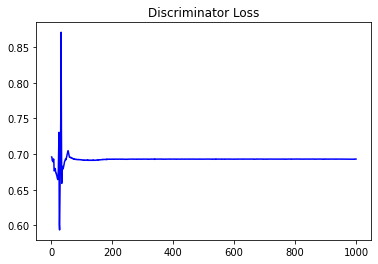

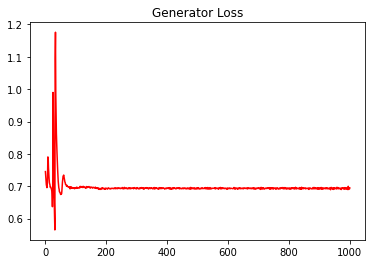

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0756274625813488


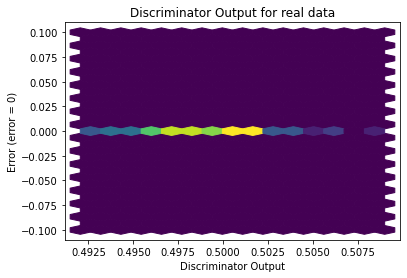

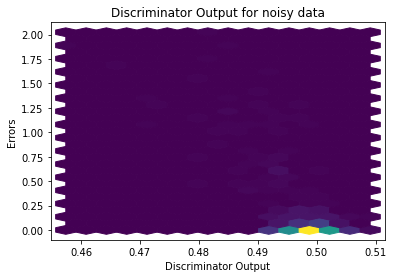

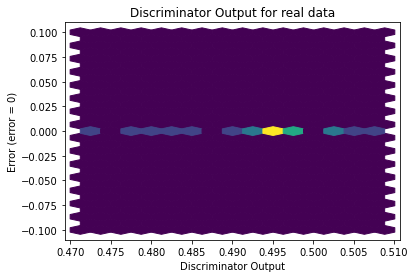

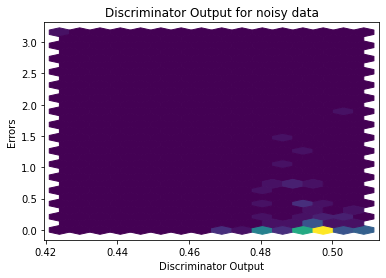

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


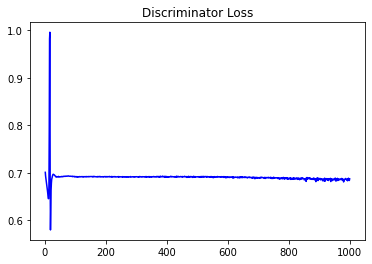

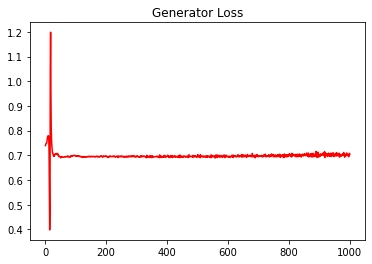

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07629918410339372


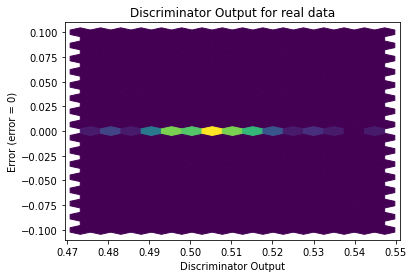

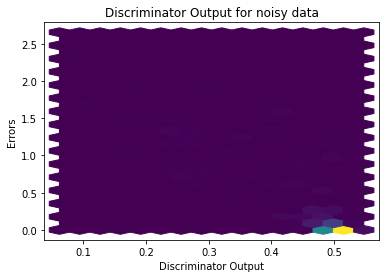

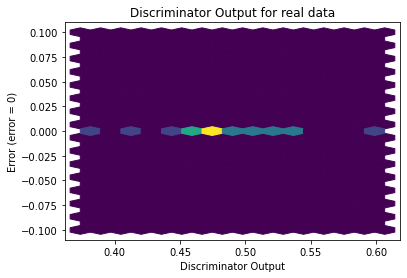

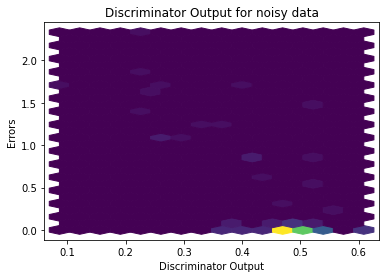

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0713]], requires_grad=True)
